In [1]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install warnings
# %pip install pickle

In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = 'vegetable_data.csv'
df = pd.read_csv(PATH)

In [4]:
df.head()

,Vegetable,Nitrogen (N),Phosphorus (P),Potassium (K),Rainfall (mm),pH,Temperature,Humidity
0,Peas,149,108,135,190.778881,5.699492,18.781453,65.254290
1,Peas,149,115,134,183.666948,6.534578,18.080073,63.242611
2,Beans,147,127,141,218.552087,6.838866,18.471494,67.890419
3,Spinach,160,134,163,206.859165,6.733207,17.184754,63.027145
4,Brussels sprouts,199,170,199,216.551025,6.245567,19.185033,69.199324


In [5]:
df.tail()

,Vegetable,Nitrogen (N),Phosphorus (P),Potassium (K),Rainfall (mm),pH,Temperature,Humidity
3995,Bell peppers,138,108,158,191.109841,5.959227,23.909957,69.996138
3996,Beans,159,114,148,216.973856,6.988598,23.746212,61.054593
3997,Mustard greens,148,101,130,192.117271,6.452154,19.528762,65.652873
3998,Cucumbers,162,135,140,202.887449,6.900797,25.064539,61.530824
3999,Peas,135,100,122,196.067029,6.618755,17.352042,68.862662


In [6]:
df.size

32000

In [7]:
df.shape

(4000, 8)

In [8]:
df.columns

Index(['Vegetable', 'Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)',
       'Rainfall (mm)', 'pH', 'Temperature', 'Humidity'],
      dtype='object')

In [9]:
df['Vegetable'].unique()

array(['Peas', 'Beans', 'Spinach', 'Brussels sprouts', 'Cucumbers',
       'Celery', 'Carrots', 'Lettuce', 'Tomatoes', 'Chinese cabbage',
       'Bell peppers', 'Kale', 'Zucchini', 'Radishes', 'Cauliflower',
       'Broccoli', 'Eggplant', 'Cabbage', 'Mustard greens', 'Bok choy'],
      dtype=object)

In [10]:
df.dtypes

Vegetable          object
Nitrogen (N)        int64
Phosphorus (P)      int64
Potassium (K)       int64
Rainfall (mm)     float64
pH                float64
Temperature       float64
Humidity          float64
dtype: object

In [11]:
df['Vegetable'].value_counts()

Broccoli            225
Cucumbers           215
Zucchini            212
Carrots             211
Cabbage             211
Brussels sprouts    210
Radishes            209
Bell peppers        207
Spinach             206
Mustard greens      204
Peas                200
Chinese cabbage     196
Tomatoes            196
Cauliflower         195
Celery              189
Kale                187
Bok choy            187
Beans               186
Eggplant            182
Lettuce             172
Name: Vegetable, dtype: int64

<AxesSubplot:>

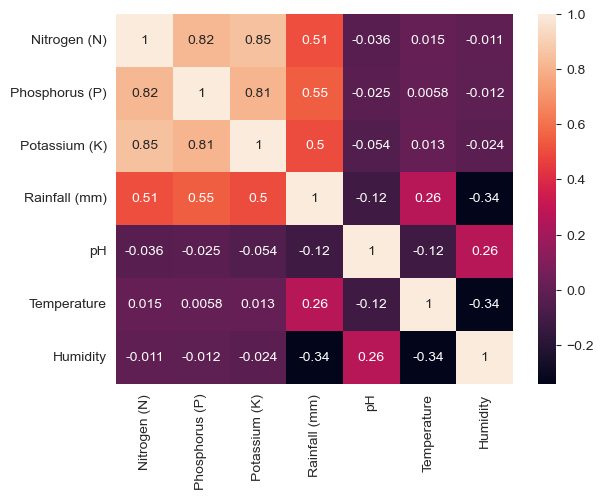

In [12]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [13]:
features = df[['Nitrogen (N)', 'Phosphorus (P)','Potassium (K)','Rainfall (mm)', 'pH', 'Temperature', 'Humidity']]
target = df['Vegetable']
labels = df['Vegetable']

In [14]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [15]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  78.25
                  precision    recall  f1-score   support

           Beans       1.00      0.20      0.33        46
    Bell peppers       0.96      0.98      0.97        47
        Bok choy       0.80      0.34      0.48        35
        Broccoli       0.96      1.00      0.98        54
Brussels sprouts       1.00      1.00      1.00        42
         Cabbage       1.00      1.00      1.00        36
         Carrots       1.00      1.00      1.00        38
     Cauliflower       0.44      0.97      0.61        36
          Celery       1.00      1.00      1.00        37
 Chinese cabbage       0.00      0.00      0.00        42
       Cucumbers       1.00      0.52      0.68        48
        Eggplant       0.53      1.00      0.69        41
            Kale       0.85      1.00      0.92        44
         Lettuce       0.90      1.00      0.95        27
  Mustard greens       0.00      0.00      0.00        40
            Peas       0.41      1.

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [19]:
score

array([0.80375, 0.8075 , 0.785  , 0.77875, 0.79875])

#### Saving trained Decision Tree model

In [20]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

## Guassian Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.87875
                  precision    recall  f1-score   support

           Beans       0.63      0.70      0.66        46
    Bell peppers       0.96      1.00      0.98        47
        Bok choy       1.00      1.00      1.00        35
        Broccoli       0.95      1.00      0.97        54
Brussels sprouts       0.95      1.00      0.98        42
         Cabbage       1.00      1.00      1.00        36
         Carrots       1.00      1.00      1.00        38
     Cauliflower       0.38      0.39      0.38        36
          Celery       1.00      1.00      1.00        37
 Chinese cabbage       0.47      0.43      0.45        42
       Cucumbers       0.88      0.94      0.91        48
        Eggplant       0.76      0.61      0.68        41
            Kale       0.91      0.93      0.92        44
         Lettuce       1.00      0.96      0.98        27
  Mustard greens       0.89      0.85      0.87        40
            Peas       0.80      0.

In [22]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.89   , 0.885  , 0.88625, 0.8925 , 0.88125])

#### Saving trained Guassian Naive Bayes model

In [23]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

## Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.4275
                  precision    recall  f1-score   support

           Beans       0.44      0.09      0.15        46
    Bell peppers       1.00      0.40      0.58        47
        Bok choy       1.00      0.20      0.33        35
        Broccoli       0.95      0.74      0.83        54
Brussels sprouts       0.96      0.55      0.70        42
         Cabbage       1.00      0.86      0.93        36
         Carrots       1.00      0.68      0.81        38
     Cauliflower       0.43      0.28      0.34        36
          Celery       1.00      0.24      0.39        37
 Chinese cabbage       0.40      0.14      0.21        42
       Cucumbers       0.89      0.50      0.64        48
        Eggplant       0.38      0.12      0.19        41
            Kale       1.00      0.11      0.20        44
         Lettuce       1.00      0.11      0.20        27
  Mustard greens       0.89      0.40      0.55        40
            Peas       0.66      0.68      0

In [25]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.3575 , 0.3575 , 0.33875, 0.35375, 0.35375])

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.75375
                  precision    recall  f1-score   support

           Beans       0.51      0.41      0.46        46
    Bell peppers       0.94      0.98      0.96        47
        Bok choy       0.79      0.74      0.76        35
        Broccoli       0.91      0.94      0.93        54
Brussels sprouts       0.85      0.93      0.89        42
         Cabbage       1.00      1.00      1.00        36
         Carrots       0.86      0.97      0.91        38
     Cauliflower       0.45      0.50      0.47        36
          Celery       0.92      0.97      0.95        37
 Chinese cabbage       0.34      0.26      0.30        42
       Cucumbers       0.64      0.60      0.62        48
        Eggplant       0.53      0.46      0.49        41
            Kale       0.66      0.66      0.66        44
         Lettuce       0.79      0.85      0.82        27
  Mustard greens       0.69      0.72      0.71        40
            Peas       0.49

In [27]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.75375, 0.77375, 0.76125, 0.76875, 0.7525 ])

#### Saving trained Logistic Regression model

In [28]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

## Random Forest 

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.89125
                  precision    recall  f1-score   support

           Beans       0.63      0.63      0.63        46
    Bell peppers       1.00      1.00      1.00        47
        Bok choy       1.00      1.00      1.00        35
        Broccoli       1.00      1.00      1.00        54
Brussels sprouts       1.00      1.00      1.00        42
         Cabbage       1.00      1.00      1.00        36
         Carrots       1.00      1.00      1.00        38
     Cauliflower       0.46      0.50      0.48        36
          Celery       1.00      1.00      1.00        37
 Chinese cabbage       0.54      0.50      0.52        42
       Cucumbers       0.94      0.96      0.95        48
        Eggplant       0.64      0.61      0.62        41
            Kale       0.93      0.95      0.94        44
         Lettuce       1.00      1.00      1.00        27
  Mustard greens       0.89      0.82      0.86        40
            Peas       0.77      0.86      0

In [30]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.89375, 0.91375, 0.8975 , 0.90125, 0.90125])

#### Saving trained Random Forest model

In [31]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## XGBoost

In [32]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

XB = xgb.XGBClassifier()

# Encode the target variable
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)

# Fit the model on the encoded target variable
XB.fit(Xtrain, Ytrain_encoded)

# Predict using the trained model
predicted_values = XB.predict(Xtest)

# Decode the predicted values
predicted_labels = label_encoder.inverse_transform(predicted_values)

# Calculate accuracy
x = metrics.accuracy_score(Ytest, predicted_labels)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

# Print classification report
print(classification_report(Ytest, predicted_labels))

XGBoost's Accuracy is:  0.8925
                  precision    recall  f1-score   support

           Beans       0.66      0.72      0.69        46
    Bell peppers       1.00      1.00      1.00        47
        Bok choy       1.00      1.00      1.00        35
        Broccoli       1.00      1.00      1.00        54
Brussels sprouts       1.00      1.00      1.00        42
         Cabbage       1.00      1.00      1.00        36
         Carrots       1.00      1.00      1.00        38
     Cauliflower       0.41      0.44      0.43        36
          Celery       1.00      1.00      1.00        37
 Chinese cabbage       0.49      0.45      0.47        42
       Cucumbers       0.98      0.94      0.96        48
        Eggplant       0.70      0.63      0.67        41
            Kale       0.91      0.93      0.92        44
         Lettuce       0.96      1.00      0.98        27
  Mustard greens       0.88      0.90      0.89        40
            Peas       0.85      0.82   

In [33]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Cross validation score (XGBoost)
score = cross_val_score(XB, features, target_encoded, cv=5)
score

array([0.9025, 0.915 , 0.895 , 0.9   , 0.8875])

#### Saving trained XGBoost model

In [34]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

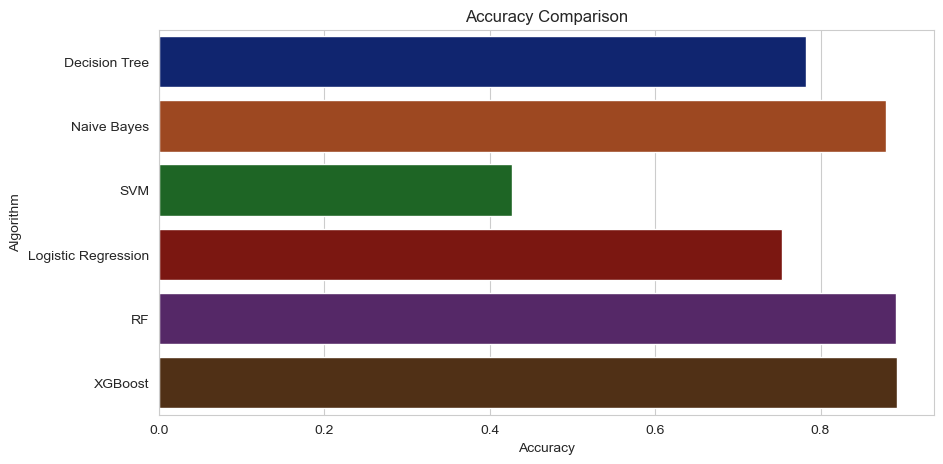

In [35]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [36]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.7825
Naive Bayes --> 0.87875
SVM --> 0.4275
Logistic Regression --> 0.75375
RF --> 0.89125
XGBoost --> 0.8925


In [37]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the two models
model1 = RandomForestClassifier()
model2 = XGBClassifier()
model3 = GaussianNB()

# Create a voting classifier
vc = VotingClassifier(estimators=[('rf', model1), ('xgb', model2),('nb', model3)], voting='soft')

# Train the voting classifier
vc.fit(Xtrain, Ytrain)

# Make predictions
y_pred = vc.predict(Xtest)

# Evaluate the predictions
print(accuracy_score(Ytest, y_pred))


0.89


## Making a prediction

In [38]:
data = np.array([[100,100,150,229.997918,6.87961,22.76863,63.713047]])
prediction = RF.predict(data)
print(prediction)

['Zucchini']


In [39]:
data = np.array([[250,200,150,190,5,18,65]])
prediction = RF.predict(data)
print(prediction)

['Cabbage']


In [40]:
data = np.array([[100,100,150,229.997918,6.87961,22.76863,63.713047]])
prediction = vc.predict(data)
print(prediction)

data = np.array([[100,100,150,229.997918,6.87961,22.76863,63.713047]])
prediction = RF.predict(data)
print(prediction)

data = np.array([[100,100,150,229.997918,6.87961,22.76863,63.713047]])
prediction = NaiveBayes.predict(data)
print(prediction)

data = np.array([[100,100,150,229.997918,6.87961,22.76863,63.713047]])
prediction = LogReg.predict(data)
print(prediction)

['Zucchini']
['Zucchini']
['Lettuce']
['Eggplant']
